# Assignment 4

## Instructions
<ul>
    <li> Ensure that this assignment is your own work. PLagiarism will not be tolerated </li>
    <li> Ensure that all cells of this notebook run without error when run in order </li>
    <li> Follow the late day policy. Submit assignments on time </li>
    <li> Provide clear explanation for the algorithms you implement </li>
</ul>
Date released: 26/10/2020 

Due date: 01/11/2020 

Approximate time needed: 6-7 hours
    
## DLT and Epipolar Lines

The goal of this assignment is to aid your understanding of the Direct Linear Transform as well as Epipolar geometry.

For the first part of the assignment you will find correspondences between 2D-3D points and estimate the P Matrix. You will then be required to estimate Camera Parameters from this P matrix.

The second part of this assignment will require you to construct epipolar lines on two corresponding images.

---
## 4.1
### Generating Correspondences
The first step to perform DLT is to generate correspondences. The cell below opens a new window. Clicking anywhere on the image should give you the pixel location of the image. Once you're done clicking, close the image window. The cell after displays the points you have clicked.

In [1]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
image_points = []
fig = plt.figure(figsize=(20,30))

img=mpimg.imread('Images/dlt1.jpeg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    # print(ix, iy)
    image_points.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

### Here we have considered the bottom left corner of the visible green edge as the origin, each side of length 4 units, and the choice of points taken in sequence green bottom left, green bottom right, green top right, green top left, red bottom right, red top right.

[[ 127.91178334  586.26464998]
 [ 338.09613557  733.68561926]
 [ 348.31343047  501.60706367]
 [  84.12337662  339.58995882]
 [ 519.08821666  567.28967374]
 [ 568.71507761  335.21111815]
 [ 183.37709851  622.75498891]]


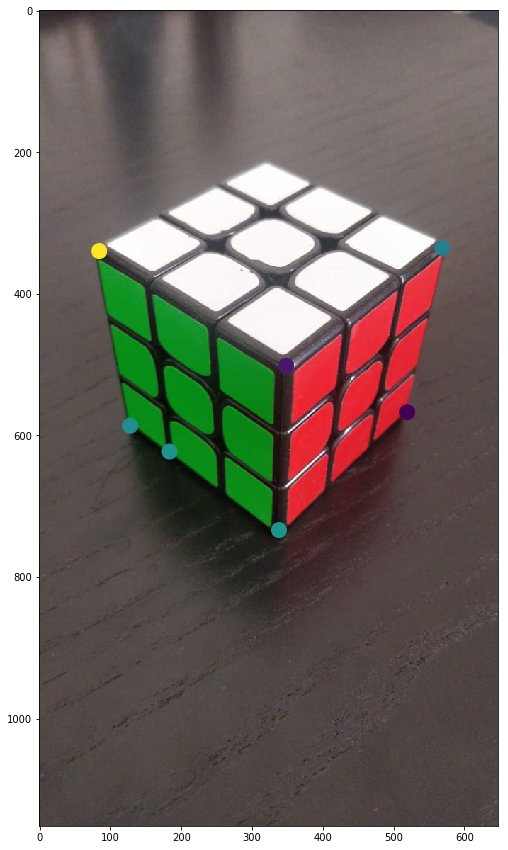

In [3]:
%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('Images/dlt1.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

print (image_points)
plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

After generating pixel locations, you have to generate the corresponding world points. You have the freedom to chose which point you want as origin. You can consider each side as 4 units.

Ensure that the ordering of your points matches the ordering of image points. Keep track of the sequence of corners clicked.

![cube](cube.jpeg)

In [4]:
#We'll rename image_points to x to match textbook convention
x = image_points
# X represents the 3D world points
X = []
#Add your points here
#Add them as 3D points only
# X.append([1,0,0])
X.append([0,0,0])
X.append([4,0,0])
X.append([4,4,0])
X.append([0,4,0])
X.append([4,0,4])
X.append([4,4,4])
X.append([4/3,0,0])
# X.append([0,4/3,0])
# X.append([4/3,4/3,0])
# X.append([8/3,0,0])

X = np.array(X)
# X = X * 0.01

Now that we have the correspondences, we can estimate the P matrix. Implement the DLT function that returns the P matrix

Quick recap: x_i = P * X_i where (x_i, X_i) is the ith correspondence, and P is a 3x4 dimensional matrix. P is further decomposed as P = K * [ R | T].


In [5]:
#Helper functions
#appends a ones column to input
def hom_coords(x,X):
    n = x.shape[0]
    size = (n,1)
    ones = np.ones(size)
    x = np.concatenate(
        (x,ones),
        axis = 1)
    X = np.concatenate(
        (X,ones),
        axis = 1)
    return x, X

x,X = hom_coords(x,X)
# print (x,X)

#### Explanation

Edit this cell and explain the DLT algorithm:

![DLT](dlt1.jpeg)
![DLT](dlt2.jpeg)

In [6]:
#DLT function takes as input 
#the image points and world points
#return a 3x4 matrix
def DLT(x,X):
    M = []
    for i in range(x.shape[0]):
        M.append([-1*X[i,0], -1*X[i,1], -1*X[i,2], -1, 0, 0, 0, 0, x[i,0]*X[i,0], x[i,0]*X[i,1], x[i,0]*X[i,2], x[i,0]])
        M.append([0, 0, 0, 0, -1*X[i,0], -1*X[i,1], -1*X[i,2], -1, x[i,1]*X[i,0], x[i,1]*X[i,1], x[i,1]*X[i,2], x[i,1]])
    M = np.array(M)
#     w, v = np.linalg.eig(M.T @ M)
#     p = v[:,-1]/v[-1,-1]
#     P = []
#     P.append(p[0:4])
#     P.append(p[4:8])
#     P.append(p[8:12])
#     P = np.array(P)
#     w, v1 = np.linalg.eig(M.T @ M)
#     p = v1[:,-1]
    u,s,v = np.linalg.svd(M)
#     print (v1,v.T)
    P_est = (v[-1,:]/v[-1,-1]).reshape((3,4))
    return P_est
# def dlt(L,proj_x,proj_y,points):
#     M = []
#     for i in (L):
#         xi = proj_x[i]
#         yi = proj_y[i]
#         x, y, z = points[i, 0], points[i, 1], points[i, 2]
#         M.append([-x,-y,-z,1,0,0,0,0,xi*x,xi*y,xi*z,xi])
#         M.append([0,0,0,0,x,y,z,1,yi*x,yi*y,yi*z,yi])
#         M = np.asarray(M)
#         u,s,v = np.linalg.svd(M)
#         P_est = (v[-1,:]/v[-1,-1]).reshape((3,4))
#         return P_est
# proj_x = x[:,0]/x[:,2]
# proj_y = x[:,1]/x[:,2]
# L = np.random.randint(0,X.shape[0]-1,size=6)
P = DLT(x,X)
print(P)

[[  4.32752751e+01  -1.43522288e+01   6.00219995e+01   1.24582147e+02]
 [  1.72281291e+01  -7.64182624e+01  -1.53834828e+01   5.81100708e+02]
 [ -2.86590758e-02  -4.86575872e-02   3.80851568e-02   1.00000000e+00]]


## Analysing P

The next part of this question is to analyse how good our estimate is. Report the reprojection error of your P matrix

In [7]:
#Get reprojected points
def get_points(P,X):
    points = P @ X.T
    points = points / points[2]
    points = points.T[:,0:2]
    return points

#Get reprojection error
def get_err(x, X, P):
    points = get_points(P, X)
    print(points.shape)
    print(x[:,:2].shape)
    """
    find the MSE between reprojected points
    and x
    """
    mse = np.mean(np.sum(np.square(points - x[:,:2]),1))
    rmse = np.sqrt(mse)
    #to err is to human
    return mse,rmse

mse,rmse = get_err(x,X,P)
print ("Mean squared error: ",mse)
print ("Root mean squared error: ",rmse)

(7, 2)
(7, 2)
Mean squared error:  17.9345857206
Root mean squared error:  4.2349245236


Given the P matrix, we can estimate K, R and T. Write a function that returns K,R,T given P.
Note: 
P = K * [R | T] where K is a 3x3 matrix and [R | T], P are 3x4 matrices
![Decomposition of P](P_decomp.jpeg)

In [8]:
def ret_RKT(P):
    H_inf = P[:,0:3]
    h = P[:,3].T
    t = np.matmul(np.linalg.inv(H_inf),h)
    q,r = np.linalg.qr(np.linalg.inv(H_inf))
    R = q.T
    t = R @ t
    K = np.linalg.inv(r)
#     T = - K @ R @ X0
#     R_zp = np.array([[-1, 0, 0],[0,1,0],[0,0,1]])
#     K = np.matmul(K,R_zp)
#     R = np.matmul(R_zp,R)
    return R, K, t

R,K,t = ret_RKT(P)
print("R: ",R)
print("K: ",K/K[-1,-1])
print("t: ",t)

R:  [[-0.76957536 -0.04527518 -0.63694892]
 [ 0.4803298  -0.69830658 -0.5307082 ]
 [-0.42075771 -0.71436551  0.55914656]]
K:  [[ -1.04069296e+03  -1.53495996e+01   3.75925603e+02]
 [  0.00000000e+00   1.02480710e+03   5.68761814e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
t:  [  3.54319797   0.17676814  14.68148231]


Reproject the world points with P matrix you have obtained via DLT:

Reconstructed P:  [[  4.32752751e+01  -1.43522288e+01   6.00219995e+01   1.24582147e+02]
 [  1.72281291e+01  -7.64182624e+01  -1.53834828e+01   5.81100708e+02]
 [ -2.86590758e-02  -4.86575872e-02   3.80851568e-02   1.00000000e+00]]
Original P:  [[  4.32752751e+01  -1.43522288e+01   6.00219995e+01   1.24582147e+02]
 [  1.72281291e+01  -7.64182624e+01  -1.53834828e+01   5.81100708e+02]
 [ -2.86590758e-02  -4.86575872e-02   3.80851568e-02   1.00000000e+00]]


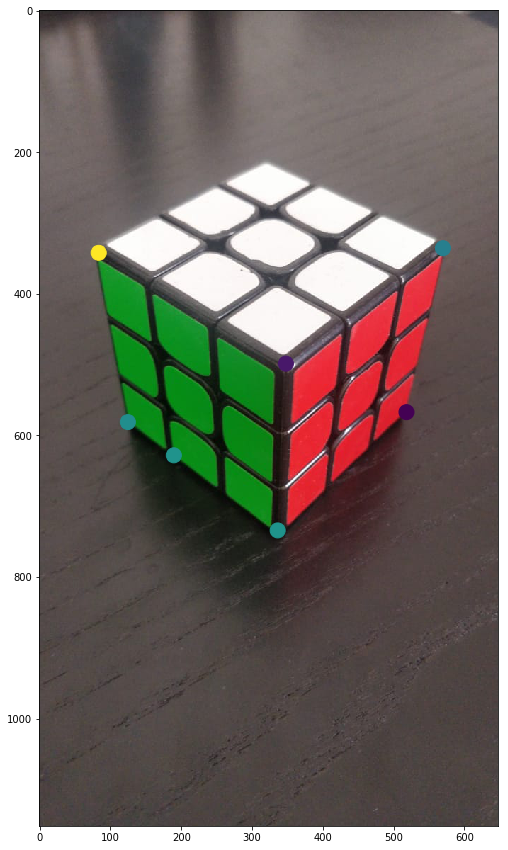

In [9]:
# print (t.reshape(3,1))
a = np.hstack((R,t.reshape((3,1))))
# print (a)
new_P = K @ a
print ("Reconstructed P: ",new_P)
print ("Original P: ",P)
re_proj = get_points(P, X)
%matplotlib inline
N = len(re_proj)
re_proj = np.array(re_proj)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('Images/dlt1.jpeg')
imgplot = plt.imshow(img)

# colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(re_proj[:,0], re_proj[:,1], c=colors,s=area)
plt.show()

### Zhangs method

For this task, use the inbuilt Opencv function to estimate the K matrix of a camera. Use the checkerboard images 5456-5470 in images/zhangs folder for this task. Familiarize yourself with the different parameters for this method.

In [16]:
#Code for zhangs here
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# we choose checkerboard size to be (8,6) as visible from the given images
objp = np.zeros((6 * 8, 3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
prev_img_shape = None

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('Images/Zhangs/*.JPG')
images.sort()
print (images)
for fname in images:
    img = cv2.imread(fname)
#     print (fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     print ("I'm not stuck here")
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        print ("Corners detected")
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)
cv2.destroyAllWindows()
# h,w = img.shape[:2]

['Images/Zhangs/IMG_5456.JPG', 'Images/Zhangs/IMG_5457.JPG', 'Images/Zhangs/IMG_5458.JPG', 'Images/Zhangs/IMG_5459.JPG', 'Images/Zhangs/IMG_5460.JPG', 'Images/Zhangs/IMG_5461.JPG', 'Images/Zhangs/IMG_5462.JPG', 'Images/Zhangs/IMG_5463.JPG', 'Images/Zhangs/IMG_5464.JPG', 'Images/Zhangs/IMG_5465.JPG', 'Images/Zhangs/IMG_5466.JPG', 'Images/Zhangs/IMG_5467.JPG', 'Images/Zhangs/IMG_5468.JPG', 'Images/Zhangs/IMG_5469.JPG', 'Images/Zhangs/IMG_5470.JPG']
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected
Corners detected


In [17]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[1.36415095e+04 0.00000000e+00 3.31635924e+03]
 [0.00000000e+00 1.36632518e+04 1.50037425e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[ 9.79058905e-02  9.45875610e+00 -1.53011897e-02  2.72096692e-02
  -1.48434421e+02]]
rvecs : 

[array([[-0.01040572],
       [-0.04719487],
       [-0.00305521]]), array([[-0.00628757],
       [ 0.228278  ],
       [ 0.03519236]]), array([[-0.00934506],
       [-0.41443159],
       [-0.03564633]]), array([[ 0.01632711],
       [-0.61709958],
       [-0.07773616]]), array([[0.00513071],
       [0.30996094],
       [0.06536842]]), array([[-0.32562262],
       [-0.22056307],
       [-0.01697744]]), array([[-0.19331793],
       [-0.38351391],
       [-0.00385093]]), array([[ 0.24480951],
       [-0.32074976],
       [ 0.02437853]]), array([[0.31052522],
       [0.06843467],
       [0.07015432]]), array([[ 0.34965338],
       [-0.56196715],
       [-0.06068481]]), array([[ 0.22473602],
       [-0.40391399],
       [-0.05

cameraMatrix $\rightarrow$ Intrinsic camera matrix \
distCoeffs $\rightarrow$ Lens distortion coefficients. \
rvecs $\rightarrow$ Rotation specified as a 3×1 vector. The direction of the vector specifies the axis of rotation and the magnitude of the vector specifies the angle of rotation. \
tvecs $\rightarrow$ 3×1 Translation vector.

---
## 4.2
### Epipolar lines
#### Task 1

For this task, you have been given two images of the same scene taken from different view-points. The fundamental matrix that encodes their relative geometry as well as a subset of corresponding points have been provided to you. The images are in q2 folder.

Recall that given a point in one image, it's corresponding location in the other image can be found to along a line viz. the epipolar line. The task given to you is to draw the epipolar lines in the second image for each given point in the first image. You have to repeat this for the other image as well. Draw epipolar lines on the first image for the corresponding points in the second image.

The convention used for F is $x'^{T}Fx$ where $x'$ is the location of the point in the second image.

### Reading data
We read the points x and corresponding points x' from the file `data.txt` given as well as the F matrix provided. We convert x and x' to homogenous coordinates to be used later for finding epipolar lines and store in arrays `img_1` and `img_2`.

In [18]:
data_file = "q2/data.txt"

with open(data_file, 'r') as f:
    A = f.readlines()
# print (A)
img_points1 = A[2:12]
img_points1 = [i.strip()[:-1] for i in img_points1]
img_points1[0] = img_points1[0][1:]
# print (img_points1)
img_points2 = A[15:25]
img_points2 = [i.strip()[:-1] for i in img_points2]
img_points2[0] = img_points2[0][1:]

F_mat = A[28:31]
F_mat = [i.strip()[:-1] for i in F_mat]
F_mat[0] = F_mat[0][1:]

img_1 = []
img_2 = []
F_MAT = []

for i in img_points1:
    pt = i[1:-1].split(' ')
    for j in range(len(pt)):
        pt[j] = int(pt[j])
    pt.append(1)
    pt = np.asarray(pt)
    img_1.append(pt)
# print (img_1)
for i in img_points2:
    pt = i[1:-1].split(' ')
    for j in range(len(pt)):
        pt[j] = int(pt[j])
    pt.append(1)
    pt = np.asarray(pt)
    img_2.append(pt)
# print (img_2)    
for i in F_mat:
    F_MAT.append(np.fromstring(i[1:-1], sep=' '))

img_1 = np.array(img_1)
img_2 = np.array(img_2)
F_mat = np.array(F_MAT)

Provide a clear explanation on your approach for both this task and the next:

In [25]:
import cv2
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epipolar lines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for i in range(pts1.shape[0]):
        r = lines[i][:]
        pt1 = pts1[i][:]
        pt1 = pt1.tolist()
        pt2 = pts2[i][:]
        pt2 = pt2.tolist()
        pt1 = [int(i) for i in pt1]
        pt2 = [int(i) for i in pt2]
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,5)
        img1 = cv2.circle(img1,tuple(pt1),10,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),10,color,-1)
    return img1,img2

###  To find epipolar lines:

For each point x' in image2 we find $l' = F^Tx'$ as the epipolar lines on Image1. Finally we draw the epipolar lines on Image1 using the `drawlines` function defined above.

Similarly for each point x in image1, we find $l = Fx$ as the epipolar lines on Image2. Finally we draw the epipolar lines on Image2 using the `drawlines` function defined above.

![Epipolar Lines](epipolar_lines.jpeg)

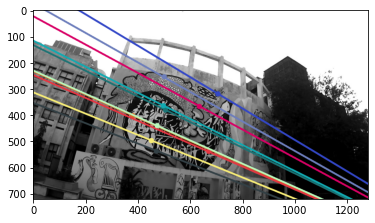

In [26]:
#Write code to plot epipolar lines on the images
%matplotlib inline
img1 = cv2.imread("q2/img1.jpg",0)
img2 = cv2.imread("q2/img2.jpg",0)

# For 2nd image
epipolar_lines_2 = []
for i in range(img_1.shape[0]):
#     print (img_1[i,:])
    epipolar_lines_2.append(np.dot(F_mat.T , img_2[i,:]))
epipolar_lines_2 = np.array(epipolar_lines_2)
img1_new, _ = drawlines(img1, img2, epipolar_lines_2, img_1[:,:2], img_2[:,:2])

# For 1st image
epipolar_lines_1 = []
for i in range(img_2.shape[0]):
    epipolar_lines_1.append(np.dot(F_mat , img_1[i,:]))
img2_new, _ = drawlines(img2, img1, epipolar_lines_1, img_2[:,:2], img_1[:,:2])

plt.imshow(img1_new)
plt.show()

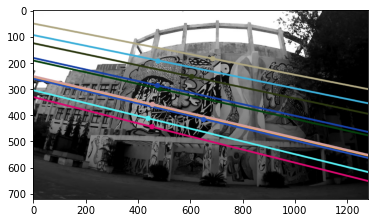

In [27]:
plt.imshow(img2_new)
plt.show()

#### Task 2
Report the location of the epipoles.

#### Since all epipolar lines intersect at the epipole, we can find the point of intersection of 2 epipolar lines by taking the cross product of the lines, and then normalizing to convert to cartesian coordinates from homogenous coordinates. We further round off the epipole coordinates to get pixel locations.

![Epipoles](epipolar_pts.jpeg)

In [28]:
x1, y1, z1 = np.cross(epipolar_lines_2[0], epipolar_lines_2[1]) 
print ("Epipole location for Image1: ",np.floor(x1/z1),np.floor(y1/z1))

Epipole location for Image1:  2159.0 1189.0


In [29]:
x2,y2,z2 = np.cross(epipolar_lines_1[0],epipolar_lines_1[1])
print ("Epipole location for Image2: ",np.floor(x2/z2),np.floor(y2/z2))

Epipole location for Image2:  -5132.0 -949.0
